# Analysis of the main colours of a painting with a graph and comparison with the human emotional perception

Importing required packages

In [1]:
from random import randint
from PIL import Image
import networkx as nx
import numpy as np
import math
import random

random.seed(0)

###### Environment setup
Create Pixel class

In [2]:
class Pixel:
    def __init__(self, r, g, b):
        self._r = r
        self._g = g
        self._b = b
        self._category = ''
        self._order = ''
    
    def get_r(self):
        return self._r

    def get_g(self):
        return self._g
    
    def get_b(self):
        return self._b
    
    def get_category(self, r, g, b):
        # category is a macro division of pixels according to their values
        category = ''
        if 0 <= r <= 127 and 0 <= g <= 127 and 0 <= b <= 127:
            category = category + 'black'
        elif 128 <= r <= 255 and 128 <= g <= 255 and 128 <= b <= 255:
            category = category + 'white'
        elif 128 <= r <= 255 and 0 <= g <= 127 and 0 <= b <= 127:
            category = category + 'red'
        elif 0 <= r <= 127 and 128 <= g <= 255 and 0 <= b <= 127:
            category = category + 'green'
        elif 0 <= r <= 127 and 0 <= g <= 127 and 128 <= b <= 255:
            category = category + 'blue'
        elif 128 <= r <= 255 and 128 <= g <= 255 and 0 <= b <= 127:
            category = category + 'yellow'
        elif 0 <= r <= 128 and 128 <= g <= 255 and 128 <= b <= 255:
            category = category + 'sky'
        elif 128 <= r <= 255 and 0 <= g <= 127 and 128 <= b <= 255:
            category = category + 'magenta'
        else:
            category = category + 'white'
        return category
            

    def get_order(self):
        # order is a string made by the three characters; the order represents which is most present; e.g. 'rbg' means
        # red the most present, blue the second most present and green the less present
        list_rgb = [self._r, self._g, self._b]
        if self._r == self._g == self._b:
            order = 'rgb'
        else:
            minimum = min(self._r, self._g, self._b)
            maximum = max(self._r, self._g, self._b)
            minimum_index = list_rgb.index(minimum)
            maximum_index = list_rgb.index(maximum)
            list_of_indexes = [0, 1, 2]
            list_of_indexes.remove(minimum_index)
            list_of_indexes.remove(maximum_index)
            dictionary = {0: 'r', 1: 'g', 2: 'b'}
            order = dictionary[maximum_index] + dictionary[list_of_indexes[0]] + dictionary[minimum_index]
        return order
    
    def get_sum(self):
        sum_pixel = self._r + self._g + self._b
        return sum_pixel
    

Generation of the set of pixels used

In [3]:
# list of pixels generated
pixel_colours = []

# generating colours of the type (0,0,value), total number = 24
for i in range(8):
    r = randint(0,5)
    g_noise = randint(-3,3)
    g = randint(31,33) * (i + 1) + g_noise
    if g > 255:
        g = 255
    b = randint(0,5)
    pixel = Pixel(r, g, b)
    pixel_colours.append(pixel)
    
for i in range(8):
    r = randint(0,5)
    g = randint(0,5)
    b_noise = randint(-3,3)
    b = randint(31,33) * (i + 1) + b_noise
    if b > 255:
        b = 255
    pixel = Pixel(r, g, b)
    pixel_colours.append(pixel)


for i in range(8):
    r_noise = randint(-3,3)
    r = randint(31,33) * (i + 1) + r_noise
    if r > 255:
        r = 255
    g = randint(0,5)
    b = randint(0,5)
    pixel = Pixel(r, g, b)
    pixel_colours.append(pixel)

# generating colours of the type (0,value,value)
# fix a value (in total 8), for each value consider 8 values of the other value
# total number = 8 * 8 * 6 = 384

# r fixed, g not, b = 0
for i in range(8):
    r_noise = randint(-3,3)
    r = randint(31,33) * (i + 1) + r_noise
    if r > 255:
        r = 255
    for j in range(8):
        b = randint(0,5)
        g_noise = randint(-3,3)
        g = randint(31,33) * (j + 1) + g_noise
        if g > 255:
            g = 255
        pixel = Pixel(r, g, b)
        pixel_colours.append(pixel)

# r fixed, g = 0, b not
for i in range(8):
    r_noise = randint(-3,3)
    r = randint(31,33) * (i + 1) + r_noise
    if r > 255:
        r = 255
    for j in range(8):
        g = randint(0,5)
        b_noise = randint(-3,3)
        b = randint(31,33) * (j + 1) + b_noise
        if b > 255:
            b = 255
        pixel = Pixel(r, g, b)
        pixel_colours.append(pixel)


# r = 0, g fixed and b not
for i in range(8):
    g_noise = randint(-3,3)
    g = randint(31,33) * (i + 1) + g_noise
    if g > 255:
        g = 255
    for j in range(8):
        r = randint(0,5)
        b_noise = randint(-3,3)
        b = randint(31,33) * (j + 1) + b_noise
        if b > 255:
            b = 255
        pixel = Pixel(r, g, b)
        pixel_colours.append(pixel)

# r not, g fixed and b = 0
for i in range(8):
    g_noise = randint(-3,3)
    g = randint(31,33) * (i + 1) + g_noise
    if g > 255:
        g = 255
    for j in range(8):
        b = randint(0,5)
        r_noise = randint(-3,3)
        r = randint(31,33) *(j + 1) + r_noise
        if r > 255:
            r = 255
        pixel = Pixel(r, g, b)
        pixel_colours.append(pixel)


# r = 0, g not and b fixed
for i in range(8):
    b_noise = randint(-3, 3)
    b = randint(31,33) * (i + 1) + b_noise
    if b > 255:
        b = 255
    for j in range(8):
        r = randint(0,5)
        g_noise = randint(-3,3)
        g = randint(31,33) * (j + 1) + g_noise
        if g > 255:
            g = 255
        pixel = Pixel(r, g, b)
        pixel_colours.append(pixel)

# r not, g = 0 and b fixed
for i in range(4):
    b_noise = randint(-5,5)
    b = randint(62,66) * (i + 1) + b_noise
    if b > 255:
        b = 255
    for j in range(4):
        g = randint(0,10)
        r_noise = randint(-5,5)
        r = randint(62,66) * (j + 1) + r_noise
        if r > 255:
            r = 255
        pixel = Pixel(r, g, b)
        pixel_colours.append(pixel)


# fix two values and vary one
# total number = 8 * 8 * 3 = 192

# r and g fixed, b not
for i in range(8):
    r_noise = randint(-3,3)
    r = randint(31,33) * (i + 1) + r_noise
    if r > 255:
        r = 255
    g_noise = randint(-3,3)
    g = randint(31,33) * (i + 1) + g_noise
    if g > 255:
        g = 255
    for j in range(8):
        b_noise = randint(-3,3)
        b = randint(31,33) * (j + 1) + b_noise
        if b > 255:
            b = 255
        pixel = Pixel(r, g, b)
        pixel_colours.append(pixel)
        
# r fixed, g not, b fixed
for i in range(8):
    r_noise = randint(-3,3)
    r = randint(31,33) * (i + 1) + r_noise
    if r > 255:
        r = 255
    b_noise = randint(-3,3)
    b = randint(31,33) * (i + 1) + b_noise
    if b > 255:
        b = 255
    for j in range(8):
        g_noise = randint(-3,3)
        g = randint(31,33) * (j + 1) + g_noise
        if g > 255:
            g = 255
        pixel = Pixel(r, g, b)
        pixel_colours.append(pixel)
        
# r not, g and b fixed
for i in range(8):
    b_noise = randint(-3,3)
    b = randint(31,33) * (i + 1) + b_noise
    if b > 255:
        b = 255
    g_noise = randint(-3,3)
    g = randint(31,33) * (i + 1) + g_noise
    if g > 255:
        g = 255
    for j in range(8):
        r_noise = randint(-3,3)
        r = randint(31,33) * (j + 1) + r_noise
        if r > 255:
            r = 255
        pixel = Pixel(r, g, b)
        pixel_colours.append(pixel)
        

# one value fixed and two varing
# total number = 8 * 8 * 3 * 3 = 576

for i in range(8):
    r_noise = randint(-3,3)
    r = randint(31,33) * (i + 1) + r_noise
    if r > 255:
        r = 255
    # creating g serie
    list_g = []
    for j in range(8):
        g_noise = randint(-3,3)
        g = randint(31,33) * (j + 1) + g_noise
        if g > 255:
            g = 255
        list_g.append(g)
    # creating b serie
    list_b = []
    for j in range(8):
        b_noise = randint(-3,3)
        b = randint(31,33) * (j + 1) + b_noise
        if b > 255:
            b = 255
        list_b.append(b)
    # combine
    # g descending and b ascending
    new_g = list_g.copy()
    new_g.sort(reverse = True)
    for j in range(8):
        g = new_g[j]
        b = list_b[j]
        pixel = Pixel(r, g, b)
        pixel_colours.append(pixel)
    # g ascending and b descending
    new_b = list_b.copy()
    new_b.sort(reverse = True)
    for j in range(8):
        g = list_g[j]
        b = new_b[j]
        pixel = Pixel(r, g, b)
        pixel_colours.append(pixel)
    # both ascending
    for j in range(8):
        g = list_g[j]
        b = list_b[j]
        pixel = Pixel(r, g, b)
        pixel_colours.append(pixel)

    
for i in range(8):
    g_noise = randint(-3,3)
    g = randint(31,33) * (i + 1) + g_noise
    if g > 255:
        g = 255
    # creating r serie
    list_r = []
    for j in range(8):
        r_noise = randint(-3,3)
        r = randint(31,33) * (j + 1) + r_noise
        if r > 255:
            r = 255
        list_r.append(r)
    # creating b serie
    list_b = []
    for j in range(8):
        b_noise = randint(-3,3)
        b = randint(31,33) * (j + 1) + b_noise
        if b > 255:
            b = 255
        list_b.append(b)
    # combine
    # r ascending and b descending
    nwe_b = list_b.copy()
    new_b.sort(reverse = True)
    for j in range(8):
        g = list_g[j]
        b = new_b [j]
        pixel = Pixel(r, g, b)
        pixel_colours.append(pixel)
    # r descending and b ascending
    new_r = list_r.copy()
    new_r.sort(reverse = True)
    for j in range(8):
        r = new_r[j]
        b = list_b[j]
        pixel = Pixel(r, g, b)
        pixel_colours.append(pixel)
    # both ascending
    for j in range(8):
        r = list_r[j]
        b = list_b[j]
        pixel = Pixel(r, g, b)
        pixel_colours.append(pixel)

for j in range(8):
    b_noise = randint(-3,3)
    b = randint(31,33) * (i + 1) + b_noise
    if b > 255:
        b = 255
    # generating r and g lists
    list_r = []
    for j in range(8):
        r_noise = randint(-3,3)
        r = randint(31,33) * (j + 1) + r_noise
        if r > 255:
            r = 255
        list_r.append(r)
    list_g = []
    for j in range(8):
        g_noise = randint(-3,3)
        g = randint(31,33) * (j + 1) + g_noise
        if g > 255:
            g = 255
        list_g.append(g)
    # combine
    # r ascending and g descending
    new_g = list_g.copy()
    new_g.sort(reverse = True)
    for j in range(8):
        r = list_r[j]
        g = new_g[j]
        pixel = Pixel(r, g, b)
        pixel_colours.append(pixel)
    # r descending and g ascending
    new_r = list_r.copy()
    new_r.sort(reverse = True)
    for j in range(8):
        r = new_r[j]
        g = list_g[j]
        pixel = Pixel(r, g, b)
        pixel_colours.append(pixel)
    # both ascending
    for j in range(8):
        r = list_r[j]
        g = list_g[j]
        pixel = Pixel(r, g, b)
        pixel_colours.append(pixel)

        
# Three ascending
for i in range(8):
    r_noise = randint(-3,3)
    r = randint(31,33) * (i + 1) + r_noise
    if r > 255:
        r = 255
    g_noise = randint(-3,3)
    g = randint(31,33) * (i + 1) + g_noise
    if g > 255:
        g = 255
    b_noise = randint(-3,3)
    b = randint(31,33) * (i + 1) + b_noise
    if b > 255:
        b = 255
    pixel = Pixel(r, g, b)
    pixel_colours.append(pixel)


#### Image processing

In [4]:
from PIL import Image
im = Image.open("Giverny.jpg")

Reducing image size collapsing 3x3 squares into a single pixel; as value is put the average r, g, b values of the 9 pixels of the square

In [5]:
width = im.width
height = im.height

n_rows = height // 3
n_columns = width // 3

# initialise positions to navigate the image
pos_r = -2
pos_c = -2
# creation of three matrices that will store redm green and blue value for the pixels
new_im_r = np.zeros((n_rows, n_columns))
new_im_g = np.zeros((n_rows, n_columns))
new_im_b = np.zeros((n_rows, n_columns))

# initialize reduced image's positions
new_r_pos = 0
new_c_pos = 0
for i in range(n_rows):
    pos_r = pos_r + 3
    for j in range(n_columns):
        pos_c = pos_c + 3
        # store values for the nine pixeks that will be collasped into one
        r = []
        g = []
        b = []
        for k in range(pos_c -1, pos_c + 2):
            for m in range(pos_r -1, pos_r +2):
                colour = im.getpixel((k,m))
                r.append(colour[0])
                g.append(colour[1])
                b.append(colour[2])
        # set the new pixel as the mean
        mean_r = round(sum(r) / 9)
        mean_g = round(sum(g) / 9)
        mean_b = round(sum(b) / 9)
        new_im_r[new_r_pos, new_c_pos] = mean_r
        new_im_g[new_r_pos, new_c_pos] = mean_g
        new_im_b[new_r_pos, new_c_pos] = mean_b
        new_c_pos = new_c_pos + 1
    pos_c = -2
    new_c_pos = 0
    new_r_pos = new_r_pos + 1
       

Divide pixels according to category and then order; this subdivision will be useful later for the mapping of image's pixels into the palette defined above

In [6]:
# divide created colours into categories and order
dictionary = {0: "black", 1: "white", 2: "red", 3: "green", 4: "blue", 5: "yellow", 6: "sky", 7: "magenta"}
# merge in a dictionary 8 dictionaries, one for each category, such that the name of the dictionary is a category
# and the keys are all possible orders
dictionary2 = {value: {} for key,value in dictionary.items()}

for i in range(len(pixel_colours)):
    current_pixel = pixel_colours[i]
    r = current_pixel.get_r()
    g = current_pixel.get_g()
    b = current_pixel.get_b()
    order = current_pixel.get_order()
    if 0 <= r <= 127 and 0 <= g <= 127 and 0 <= b <= 127:
        if order in dictionary2["black"].keys():
            dictionary2["black"][order].append(current_pixel)
        else:
            dictionary2["black"][order] = [current_pixel]
    elif 128 <= r <= 255 and 128 <= g <= 255 and 128 <= b <= 255:
        if order in dictionary2["white"].keys():
            dictionary2["white"][order].append(current_pixel)
        else:
            dictionary2["white"][order] = [current_pixel]
    elif 128 <= r <= 255 and 0 <= g <= 127 and 0 <= b <= 127:
        if order in dictionary2["red"].keys():
            dictionary2["red"][order].append(current_pixel)
        else:
            dictionary2["red"][order] = [current_pixel]
    elif 0 <= r <= 127 and 128 <= g <= 255 and 0 <= b <= 127:
        if order in dictionary2["green"].keys():
            dictionary2["green"][order].append(current_pixel)
        else:
            dictionary2["green"][order] = [current_pixel]
    elif 0 <= r <= 127 and 0 <= g <= 127 and 128 <= b <= 255:
        if order in dictionary2["blue"].keys():
            dictionary2["blue"][order].append(current_pixel)
        else:
            dictionary2["blue"][order] = [current_pixel]
    elif 128 <= r <= 255 and 128 <= g <= 255 and 0 <= b <= 127:
        if order in dictionary2["yellow"].keys():
            dictionary2["yellow"][order].append(current_pixel)
        else:
            dictionary2["yellow"][order] = [current_pixel]
    elif 0 <= r <= 127 and 128 <= g <= 255 and 128 <= b <= 255:
        if order in dictionary2["sky"].keys():
            dictionary2["sky"][order].append(current_pixel)
        else:
            dictionary2["sky"][order] = [current_pixel]
    elif 128 <= r <= 255 and 0 <= g <= 127 and 128 <= b <= 255:
        if order in dictionary2["magenta"].keys():
            dictionary2["magenta"][order].append(current_pixel)
        else:
            dictionary2["magenta"][order] = [current_pixel]

Map the colours of the image into the palette of colours defined previously. To do that is computed the category and the order of current pixel and the pixel that will be choose is taken from the dictionary corresponding to current category and order. To select the correct one is computed the sum of the r, g, b values and is taken the pixel that gives the lowest difference between sums

In [7]:
# scan the image of reduced size to map pixels into the grid of pixels
image_final = Image.new("RGB", (325, 290), (0,0,0))

# pixels found in the image
used_pixels = []

for i in range(n_rows):
    for j in range(n_columns):
        # obtain curren pixel
        pixel_tuple = im.getpixel((i,j))
        r = new_im_r[i, j]
        g = new_im_g[i, j]
        b = new_im_b[i, j]
        current_pixel = Pixel(r, g, b)
        category_curr = current_pixel.get_category(r, g, b)
        order = current_pixel.get_order()
        # select possible candidates according to category and order or current pixel
        # select the less distant candidate
        list_of_candidates = dictionary2[category_curr][order]
        sum_rgb = current_pixel.get_sum()
        sum_diff = []
        for k in range (len(list_of_candidates)):
            sum_cand_k = list_of_candidates[k].get_sum()
            sum_diff.append(sum_cand_k - sum_rgb)
        minimum = min(sum_diff)
        pixel_index = sum_diff.index(minimum)
        pixel_found = list_of_candidates[pixel_index]
        r_final = pixel_found.get_r()
        g_final = pixel_found.get_g()
        b_final = pixel_found.get_b()
        # put the mapped pixel into new image
        image_final.putpixel((j, i), (r_final, g_final, b_final))
        # save pixel used (for human test)
        pix = [r_final, g_final, b_final]
        if pix not in used_pixels:
            used_pixels.append(pix)
        
# total number of pixels
total = len(used_pixels) 

print(used_pixels)
            
image_final.show()    
image_final.save("Giverny.png", format = 'png')

[[154, 157, 131], [34, 32, 0], [3, 35, 0], [34, 1, 4], [3, 2, 67], [3, 4, 29], [1, 33, 29], [130, 155, 0], [28, 130, 1], [130, 29, 4], [130, 130, 1], [129, 0, 2], [184, 159, 133], [133, 5, 128], [1, 158, 4], [131, 167, 135], [0, 0, 162], [131, 133, 135], [134, 129, 161], [134, 129, 129], [4, 128, 129], [0, 153, 128], [131, 32, 135], [4, 2, 129]]


###### Graph analysis
Is generate a graph where nodes represent colours abd edges links between them. In particular for every pixel are considered 10 other pixels form the image, an edge of weight 1 is added if a new connection is found, otherwise the edge's weight is incremented by 1. Important edges (involving most present colours) will have a high weight

{0: [154, 157, 131], 1: [34, 32, 0], 2: [3, 35, 0], 3: [34, 1, 4], 4: [3, 2, 67], 5: [3, 4, 29], 6: [1, 33, 29], 7: [130, 155, 0], 8: [28, 130, 1], 9: [130, 29, 4], 10: [130, 130, 1], 11: [129, 0, 2], 12: [184, 159, 133], 13: [133, 5, 128], 14: [1, 158, 4], 15: [131, 167, 135], 16: [0, 0, 162], 17: [131, 133, 135], 18: [134, 129, 161], 19: [134, 129, 129], 20: [4, 128, 129], 21: [0, 153, 128], 22: [131, 32, 135], 23: [4, 2, 129]}


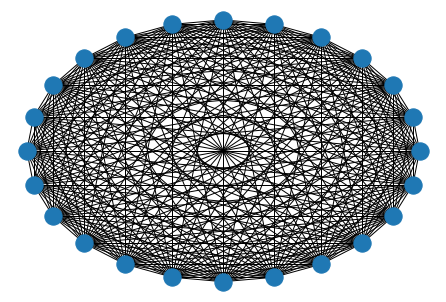

In [8]:
# Generation of the graph

# dictionary with as key the number of the node and as value the (r, g, b) tuple to retrieve information during the analysis
pixel_dictionary = dict()

G = nx.Graph()
# add nodes
for i in range(len(used_pixels)):
    G.add_node(i, dist = math.inf, pred = '', neighbors = [])
    pixel_dictionary[i] = used_pixels[i]
    
print(pixel_dictionary)

key_list = list(pixel_dictionary.keys())
value_list = list(pixel_dictionary.values())

# scan all the pixels of the image
for i in range(n_columns): 
    for j in range(n_rows): 
        pixel_tuple = image_final.getpixel((i, j))
        r = pixel_tuple[0]
        g = pixel_tuple[1]
        b = pixel_tuple[2]
        random_pixels = []
        # for each pixel select 10 random pixels from the image
        for m in range(10):
            x_rand = randint(0, n_columns - 1)
            y_rand = randint(0, n_rows - 1)
            pixel_rand = image_final.getpixel((x_rand, y_rand))
            random_pixels.append(pixel_rand)    
        # scan all random generated (coordinates) pixel to find their cluster
        for h in range(10):
            r1 = random_pixels[h][0]
            g1 = random_pixels[h][1]
            b1 = random_pixels[h][2]
            pixel_curr = [r1, g1, b1]
            # find the two nodes' number
            position1 = value_list.index(pixel_curr)
            node_curr1 = key_list[position1]
            position = value_list.index([r, g, b])
            node_curr = key_list[position]
            list_of_edges = list(G.edges())
            # add weighted edge or update existing one; no self-loops
            if node_curr != node_curr1:
                if (node_curr, node_curr1) in list_of_edges or (node_curr1, node_curr) in list_of_edges:
                    G[node_curr][node_curr1]['weight'] = G[node_curr][node_curr1]['weight'] + 1
                else:
                    G.add_edge(node_curr, node_curr1, weight = 1)
                    G.nodes()[node_curr]['neighbors'].append(node_curr1)
                    G.nodes()[node_curr1]['neighbors'].append(node_curr)

            
nx.draw_circular(G)


###### Dijkstra algorithm for SSSP
Compute SSSP using all nodes as source

In [9]:
# Divide weights: high weight means high count. If an edge has high count this means that one of the two connected nodes is 
# central. If weight is high that edge will not be selected in the SSSP but what I want is that a central node will have low
# distance so I take the inverse
for edge in G.edges():
    G.edges()[edge]['weight'] = 1 / G.edges()[edge]['weight']
    
n_nodes = len(list(G.nodes()))

def dijkstra(graph, source):
    for v in graph.nodes():
        graph.nodes()[v]['dist'] = math.inf
        graph.nodes()[v]['pred'] = ''
    # set to 0 source distance
    graph.nodes()[source]['dist'] = 0
    q1 = list(graph.nodes())
    while len(q1) != 0:
        # select node in q1 with smallest distance
        minimum = math.inf
        for u1 in q1:
            if graph.nodes()[u1]['dist'] < minimum:
                smallest_node = u1 # this is the node number
                minimum = graph.nodes()[u1]['dist']
        q1.remove(smallest_node)
        # selecting neighbors of the node with smaller distance
        neighbors_u = graph.nodes()[smallest_node]['neighbors']
        for w in neighbors_u:
            step_distance = graph.nodes()[smallest_node]['dist'] + graph[smallest_node][w]['weight']
            # if necessary update distance
            if step_distance < graph.nodes()[w]['dist']:
                graph.nodes()[w]['dist'] = step_distance
                graph.nodes()[w]['pred'] = str(smallest_node) 
    return(graph)


# Create a matrix that will contain the distances of every node in each iteration
# since graph is connected I can assume initial distance = 0
distance_matrix = [[0 for i in range(n_nodes)] for j in range(n_nodes)]

for i in range(n_nodes):
    # run SSSP with all nodes as source
    G = dijkstra(G, i)
    for j in range(n_nodes):
        distance_matrix[i][j] = distance_matrix[i][j] + G.nodes()[j]['dist']

# initialize vector that will cointain the sum of the distances for every node
sum_vector = [0 for i in range(n_nodes)]

for i in range(n_nodes):
    for j in range(n_nodes):
        sum_vector[i] = sum_vector[i] + distance_matrix[i][j]

print(sum_vector)

[0.006658002003131978, 0.00484042103816172, 0.005069523269825731, 0.005555449639305767, 0.007796615609513508, 0.01008726100954259, 0.0065163561337661996, 0.005498335449477847, 0.005976256651771097, 0.005364218090612852, 0.005800742309277876, 0.005803769989425021, 0.0060234075413611605, 0.0064921966969949665, 0.015962766842003987, 0.009171982369132383, 0.01575853518208231, 0.01309248405391566, 0.011601330687823675, 0.005989126134235237, 0.021444194623067375, 0.019361873183376243, 0.012006544816663349, 0.01078797443097059]


Compute closeness centrality

In [10]:
clos_centr = [0 for i in range(n_nodes)]

for i in range(n_nodes):
    clos_centr[i] = (n_nodes - 1) / sum_vector[i]
    
print(clos_centr)

[3454.4897987685517, 4751.652762986682, 4536.915756339085, 4140.078930294143, 2949.997941662684, 2280.1035859230674, 3529.579956629365, 4183.08417362644, 3848.5629617636687, 4287.670562882035, 3965.0097821468694, 3962.9413367359525, 3818.4366311037447, 3542.7145962237983, 1440.8529691405647, 2507.636743546823, 1459.5265190733808, 1756.7330924585874, 1982.5311956791254, 3840.293138681227, 1072.5513550067792, 1187.9015931034703, 1915.6218838311688, 2132.0035700094536]


Selecting the five most present colours

In [11]:
max_five = []
indexes = []

copy_cv = clos_centr.copy()
for i in range(5):
    massimo = max(copy_cv)
    max_five.append(massimo)
    copy_cv.remove(massimo)
    print(massimo)

for i in range(5):
    index_curr = clos_centr.index(max_five[i])
    indexes.append(index_curr)
        
print(indexes)

4751.652762986682
4536.915756339085
4287.670562882035
4183.08417362644
4140.078930294143
[1, 2, 9, 7, 3]


In [12]:
for i in indexes:
    print(pixel_dictionary[i])

[34, 32, 0]
[3, 35, 0]
[130, 29, 4]
[130, 155, 0]
[34, 1, 4]
